In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

## Problem: find the noise $i_x$

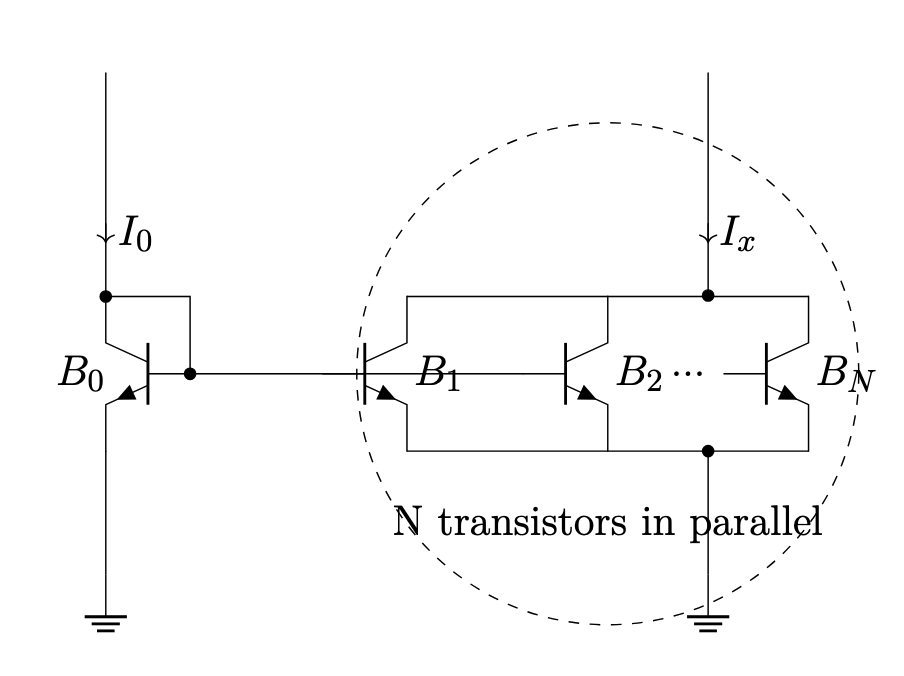

In [2]:
Image("general.png")

small signal representation

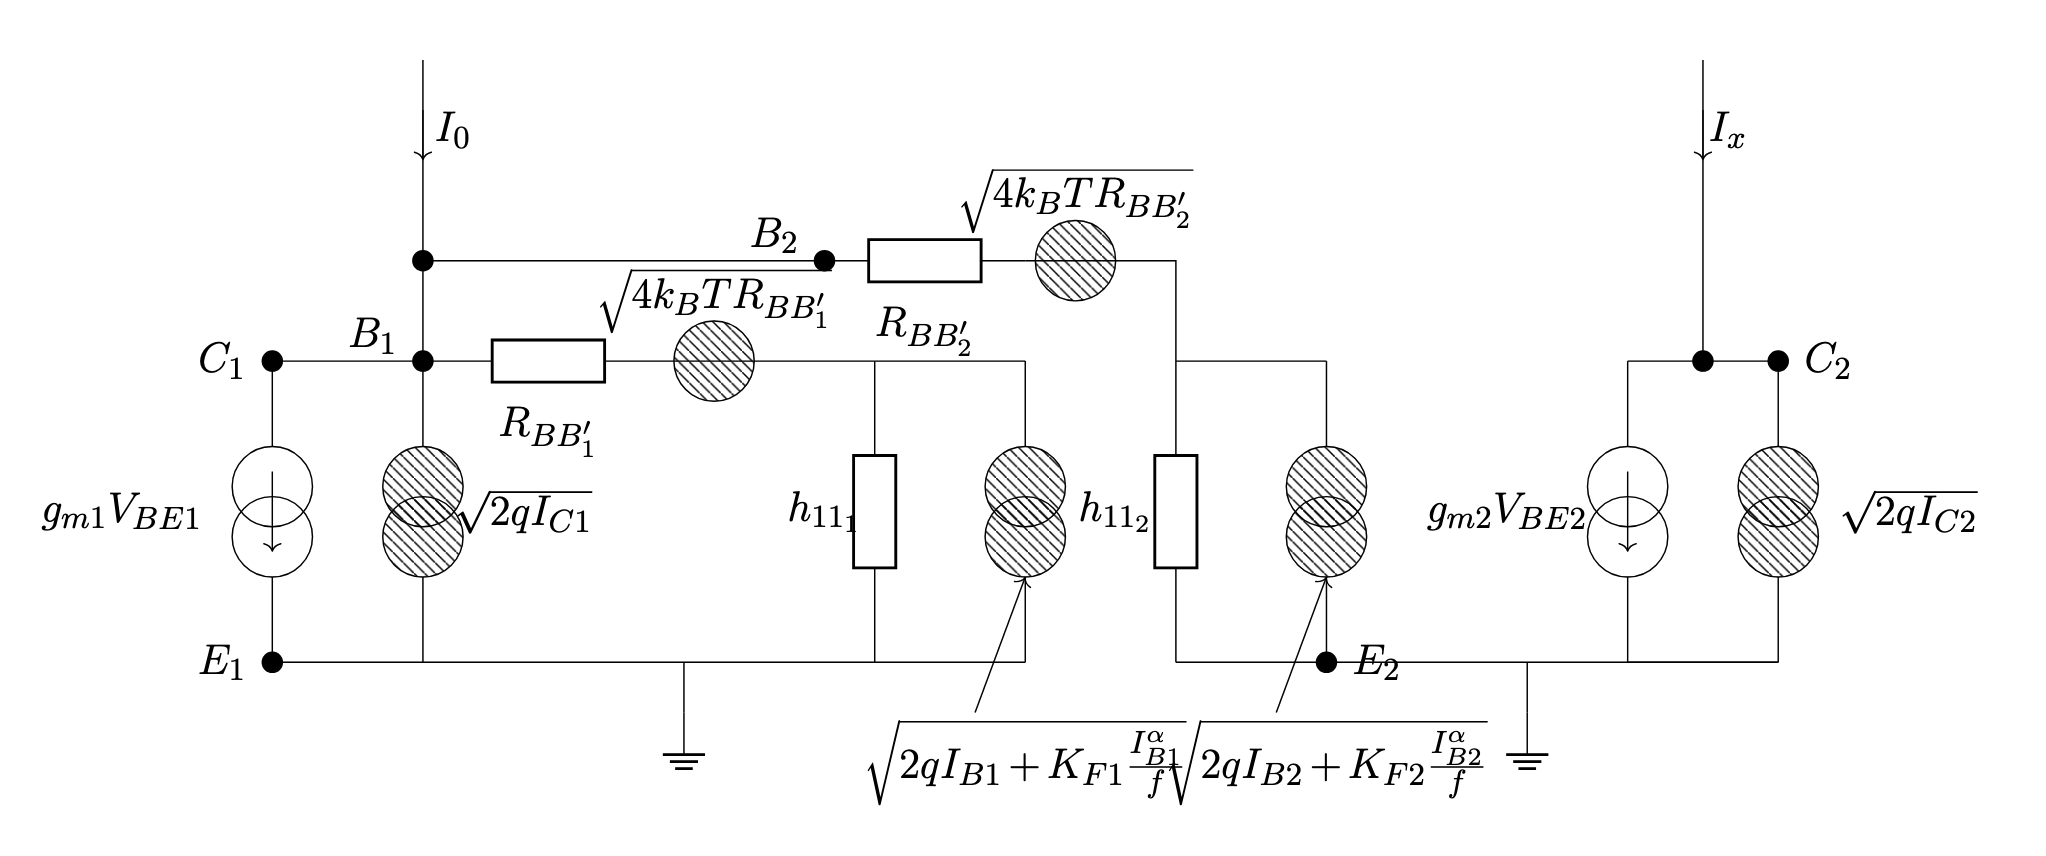

In [3]:
Image("circuit.png")

## Analytical 

Thermal noise
  $$   (4k_BTR_{BB'} ) 
         \frac{N \beta^2 I_C^2}{(N+1)(I_C R_{BB'} + {\beta V_T})^2} $$ 
Flicker noise 
 $$ K_{F} \frac{I_C^2}{f} \left( \left( \frac{  -N {\beta V_T}}{(N+1)(I_C R_{BB'} + {\beta V_T})} \right)^2 + \left( \frac{N {\beta V_T}  }{(N+1) I_C R_{BB'} + {\beta V_T}}  \right)^2   \right) $$ 
Shot noise
 $$ 2qI_C \left( \frac{\beta^3 V_T^2}{(N+1)^2(I_C R_{BB'} + \beta V_T)^2} + \frac{N^2 \beta^2}{(N+1)^2} + \frac{N^2 \beta^3 V_T^2}{\left( (N+1)I_C R_{BB'} + \beta V_T \right)^2} + N \right) $$

In [38]:
k_B = 1.38e-23
q = 1.6e-19 
gamma = 1.4
K_f = 2e-8 
Ic =  1e-3

def thermal_noise(beta, N, T,f):
    VT = k_B*T/q
    A = (4 * k_B * T * Rbb)
    B = N * beta**2 * Ic**2
    C = (N+1)*(Ic * Rbb + beta * VT)**2
    return A*B/C
def flicker_noise(beta,N,T,f):
    K_f = (2e-8)*(1/4)**0.5 *(1.923 * (5e-6 + 0.04))**1.5
    print(K_f)
    VT = k_B * T /q 
    A = K_f * ((Ic**2) / f)
    B =  (N * beta * VT)**2 /  ((N+1) * (Ic * Rbb + beta * VT))**2
    C =  (N * beta * VT / ((N+1) * Ic * Rbb + beta * VT))**2
    return A*( B + C)
def shot_noise(beta, N, T,f):
    VT = k_B * T /q 
    A = 2 * q * Ic
    B = (beta**3 * VT**2)/((N+1)**2 * (Ic * Rbb + beta * VT)**2)
    C = N**2 * beta**2  / (N+1)**2
    D = (N**2 * beta**3 * VT**2) / ((N +1) * Ic * Rbb + beta * VT)**2
    return A  * ( B + C + D + N)
def S_Ix(beta, N, T, f):
    return thermal_noise(beta, N, T,f)*np.ones(np.size(f)) + flicker_noise(beta, N, T, f) + shot_noise(beta, N, T,f)*np.ones(np.size(f))

In [39]:
# test spectrum 
# N = 1
# K_f = (2e-8)*(1/4)**0.5 *(1.923 * (5e-6 + 0.04))**1.5
# VT = k_B * T / q 
# h111 = beta * VT / Ic 
# h112 = h111 / N
# Ic1 = Ic 
# Ic2 = N * Ic1
# Rbb1 = Rbb
# Rbb2 = Rbb1 / N
# Ib = beta * Ic 
# Ib1 = Ib
# Ib2 = N * Ib1
# alpha = 2
# SVBE2 = (
#         ((4 * k_B * T * Rbb2) * h112 / (Rbb1 + Rbb2 + h111 + h112))**2
#         + ((2 * q * Ib2 + K_f * Ib2 ** alpha / f )**0.5 * (h112 * (Rbb1 + Rbb2 + h111) / (h112 + Rbb1 + Rbb2 + h111)))**2
#         + ((2 * q * Ic1)**0.5 * (h111 * (h111 + Rbb1)) / (h111 + h112 + Rbb1 + Rbb2))**2
#         + ((2 * q * Ib1 * K_f * Ib1 ** alpha / f)**0.5 * ((h111 * h112)/(Rbb1 + Rbb2 + h112)))**2
#         + ((4 * k_B * T * Rbb1)**0.5 * (h112 / (Rbb1 + Rbb2 + h111 + h112)))**2
#         )
# SIx = beta**2 * SVBE2 / h112**2 + 2 * q * Ic2 

In [31]:
# print(np.sqrt(thermal_noise(900,1,300,1)))

## Initial plot with these parameter

$$ R_{BB'} = 5 \Omega $$

$$ \beta = 500 $$

$$ I_C = 1mA $$

$$ T = 300 K $$

2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10


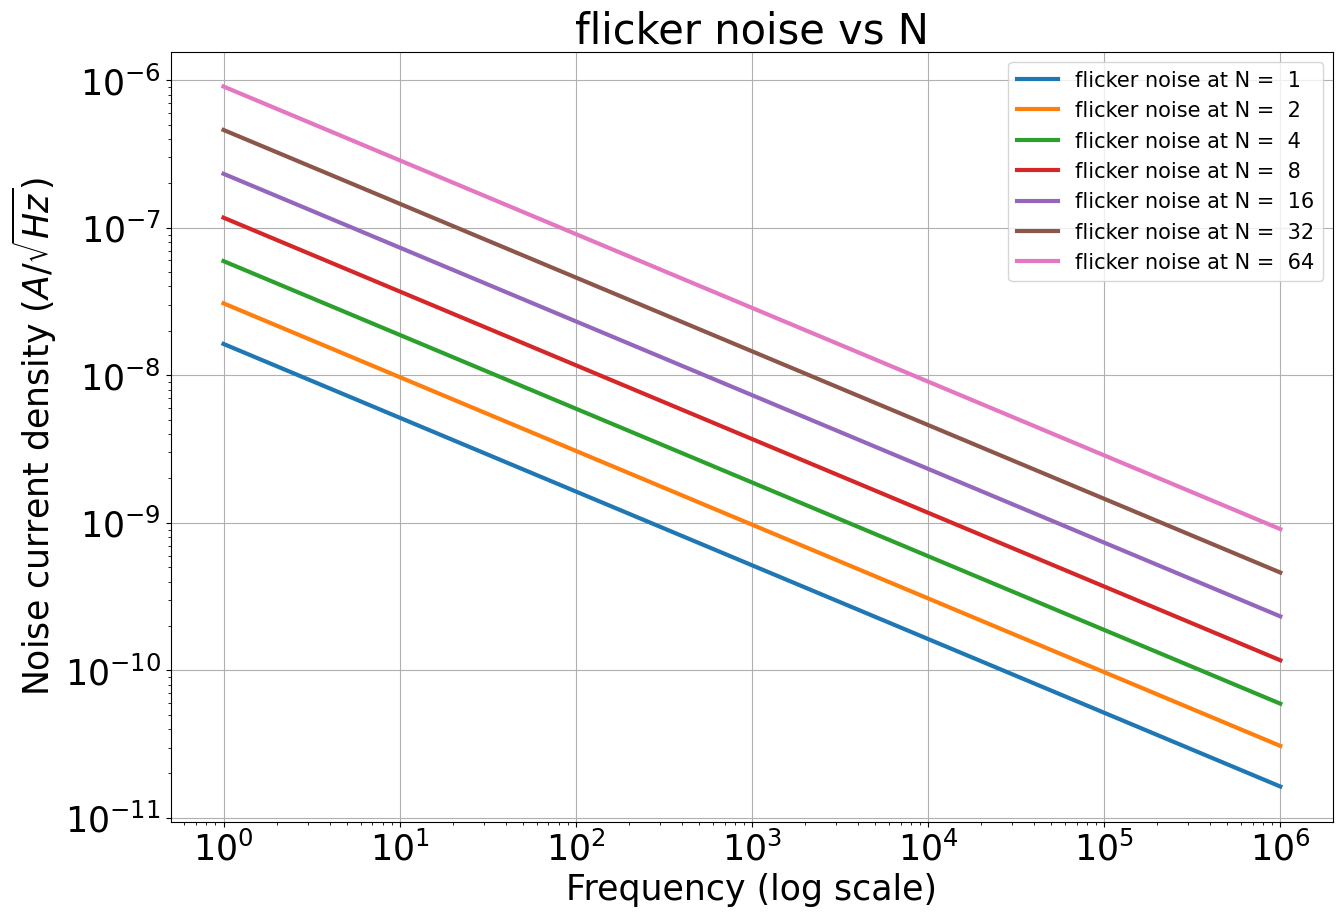

In [74]:
Rbb = 5
beta = 400
Ic = 1e-3
T = 300
gamma = 1.7
f = np.linspace(1,1e6,100000)

N = [1, 2, 4, 8, 16, 32, 64]

plt.figure(figsize = (15,10))
for n in N:
    plt.loglog(f, np.sqrt(flicker_noise(beta, n, T, f))*np.ones(np.size(f)) ,lw =  3, label = f'flicker noise at N =  {n}')
    # plt.loglog(f, np.sqrt(S_Ix(beta, n, T, f)) ,lw =  3, label = f'total noise at N =  {n}')
plt.title('flicker noise vs N',fontsize = 30)
plt.legend()
plt.xlabel('Frequency (log scale)', fontsize = 25)
plt.ylabel(r'Noise current density $(A/ \sqrt{Hz})$',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)
plt.grid()

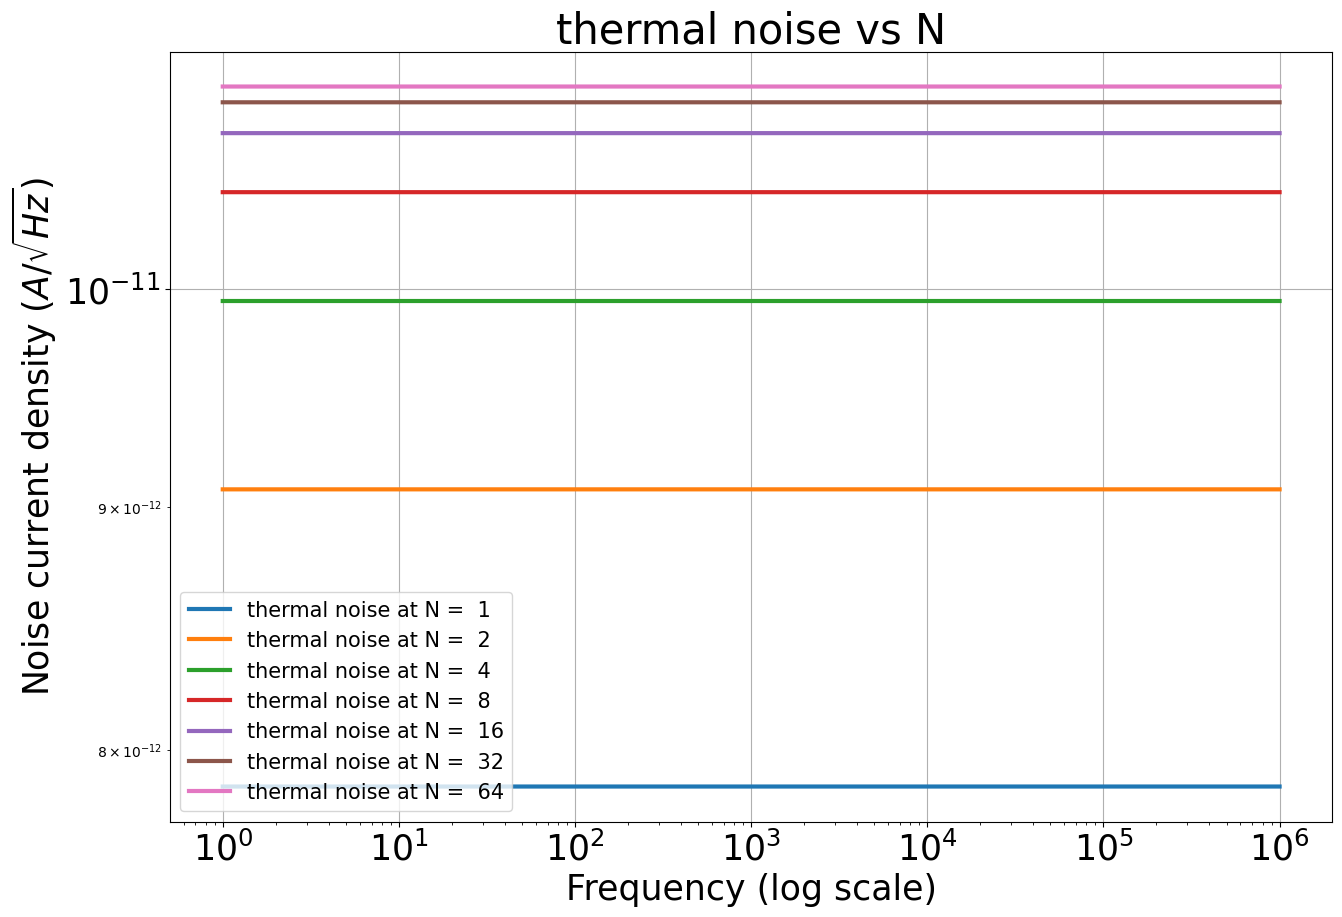

In [75]:
plt.figure(figsize = (15,10))
for n in N:
    plt.loglog(f, np.sqrt(thermal_noise(beta, n, T,f))*np.ones(np.size(f)) ,lw =  3, label = f'thermal noise at N =  {n}')
    # plt.loglog(f, np.sqrt(S_Ix(beta, n, T, f)) ,lw =  3, label = f'total noise at N =  {n}')
plt.title('thermal noise vs N',fontsize = 30)
plt.legend()
plt.xlabel('Frequency (log scale)', fontsize = 25)
plt.ylabel(r'Noise current density $(A/ \sqrt{Hz})$',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)
plt.grid()

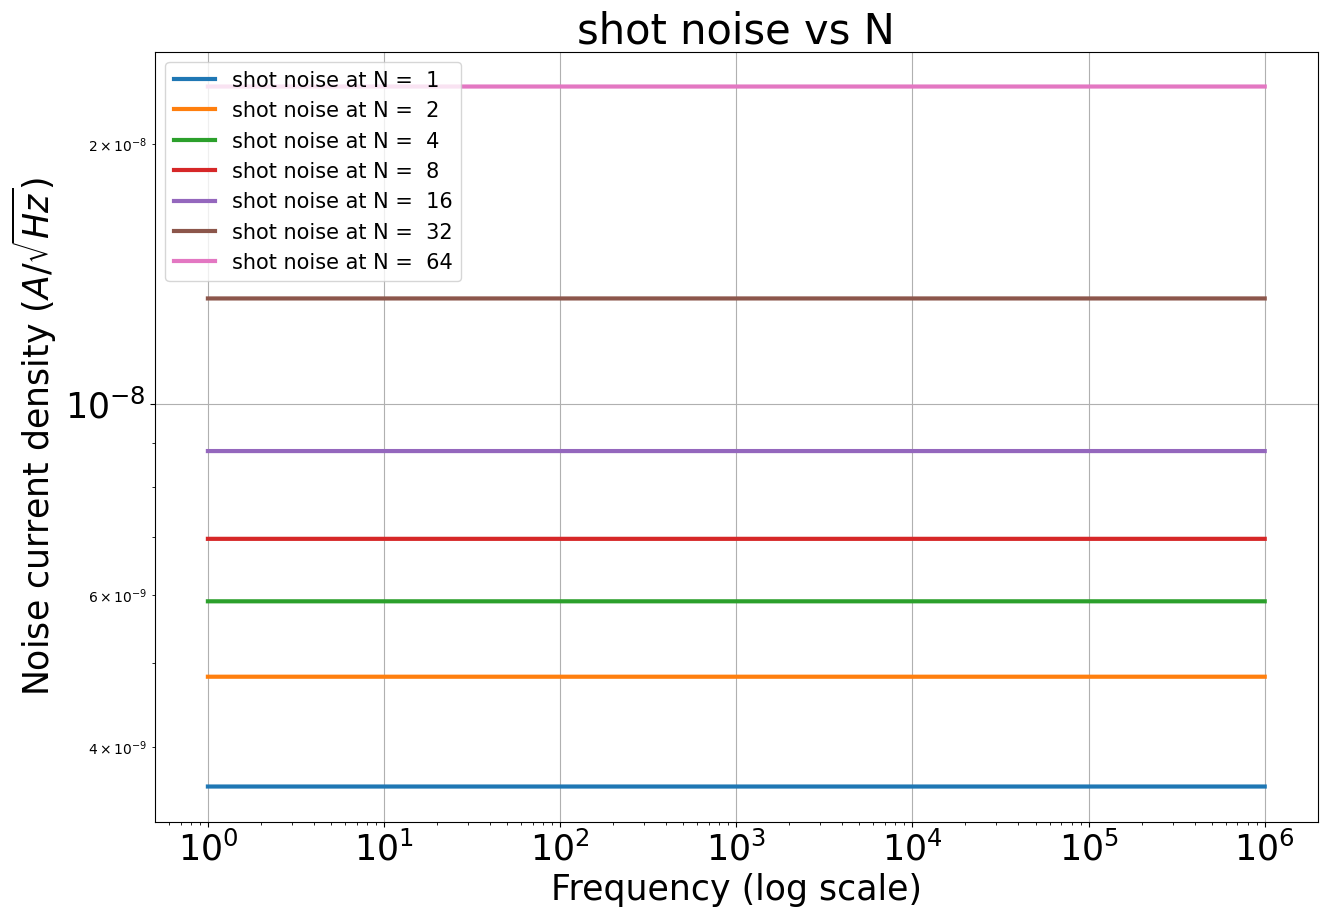

In [76]:
# N =  [1]
plt.figure(figsize = (15,10))
for n in N:
    plt.loglog(f, np.sqrt(shot_noise(beta, n, T,f))*np.ones(np.size(f)) ,lw =  3, label = f'shot noise at N =  {n}')
    # plt.loglog(f, np.sqrt(S_Ix(beta, n, T, f)) ,lw =  3, label = f'total noise at N =  {n}')
plt.title('shot noise vs N',fontsize = 30)
plt.legend()
plt.xlabel('Frequency (log scale)', fontsize = 25)
plt.ylabel(r'Noise current density $(A/ \sqrt{Hz})$',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)
plt.grid()

### Calculation to verify the derivation, using original equation (6.1 in the node)

In [77]:
N = 1
beta = 400
Rbb = 5
K_f = (2e-8)*(1/4)**0.5 *(1.923 * (5e-6 + 0.04))**1.5
VT = k_B * T / q 
h111 = beta * VT / Ic 
h112 = h111 / N
Ic1 = Ic 
Ic2 = N * Ic1
Rbb1 = Rbb
Rbb2 = Rbb1 / N
Ib =  Ic / beta
Ib1 = Ib
Ib2 = N * Ib1
alpha = 2

print(f' h111 = {h111} Ohm, h112 = {h112} Ohm')
print(f' Rbb1 = {Rbb1} Ohm, Rbb2 = {Rbb2} Ohm')
print(f' Ib1 = {Ib1} Ohm, Ib2 = {Ib2} Ohm')

print(f'Kf = {K_f}')
def SIx(f):
     alpha = 2
     num = np.ones(np.size(f))
     SVBE2 = (
     ((4 * k_B * T * Rbb2) * h112 / (Rbb1 + Rbb2 + h111 + h112))**2 * num
     + ((2 * q * Ib2 * num + K_f * (Ib2 ** alpha) / f )**0.5 * (h112 * (Rbb1 + Rbb2 + h111) / (h112 + Rbb1 + Rbb2 + h111)))**2
     + ((2 * q * Ic1 * num)**0.5 * (h111 * (h111 + Rbb1)) / (h111 + h112 + Rbb1 + Rbb2))**2 * num
     + ((2 * q * Ib1 * num + K_f * (Ib1 ** alpha) / f)**0.5 * ((h111 * h112)/(Rbb1 + Rbb2 + h112)))**2
     + ((4 * k_B * T * Rbb1)**0.5 * (h112 / (Rbb1 + Rbb2 + h111 + h112)))**2 * num
     )
     return np.sqrt(beta**2 * SVBE2 / h112**2)# + 2 * q * Ic2 

print(SIx(1))

 h111 = 10350.000000000002 Ohm, h112 = 10350.000000000002 Ohm
 Rbb1 = 5 Ohm, Rbb2 = 5.0 Ohm
 Ib1 = 2.5e-06 Ohm, Ib2 = 2.5e-06 Ohm
Kf = 2.1337342993949578e-10
[1.67127619e-08]


2.1337342993949578e-10


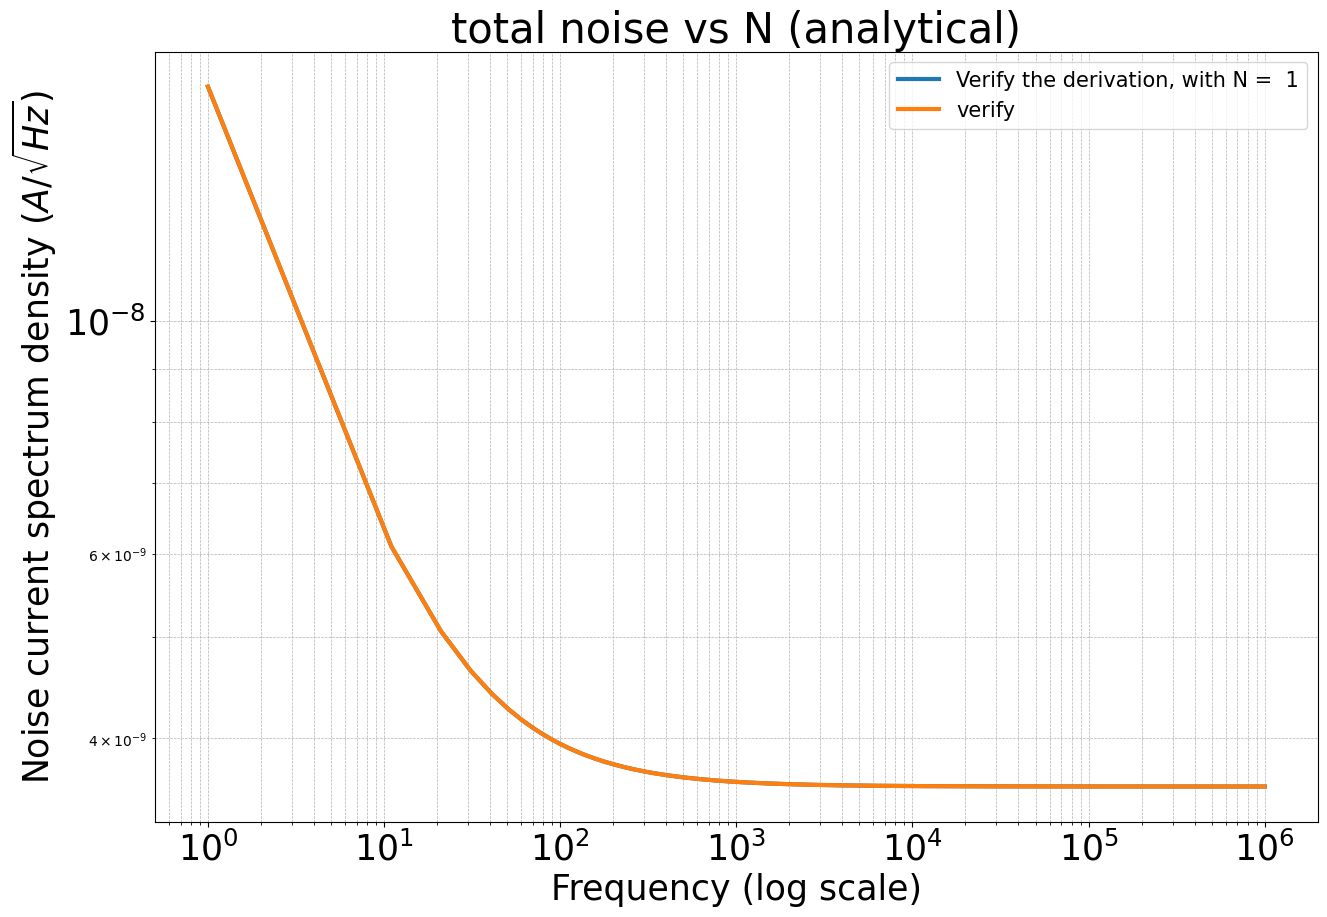

In [78]:
plt.figure(figsize = (15,10))
N = [1]
for n in N:
    # plt.loglog(f, np.sqrt(flicker_noise(beta, n, T, f))*np.ones(np.size(f)) ,lw =  3, label = f'flicker noise at N =  {n}')
    plt.loglog(f, (S_Ix(beta, n, T, f))**0.5 ,lw =  3, label = f'Verify the derivation, with N =  {n}')
plt.loglog(f, SIx(f) ,lw =  3, label = 'verify')
plt.title('total noise vs N (analytical)',fontsize = 30)
plt.legend()
plt.xlabel('Frequency (log scale)', fontsize = 25)
plt.ylabel(r'Noise current spectrum density $(A/ \sqrt{Hz})$',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

So far it seems my derivation is **correct**

### Changing beta


2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10


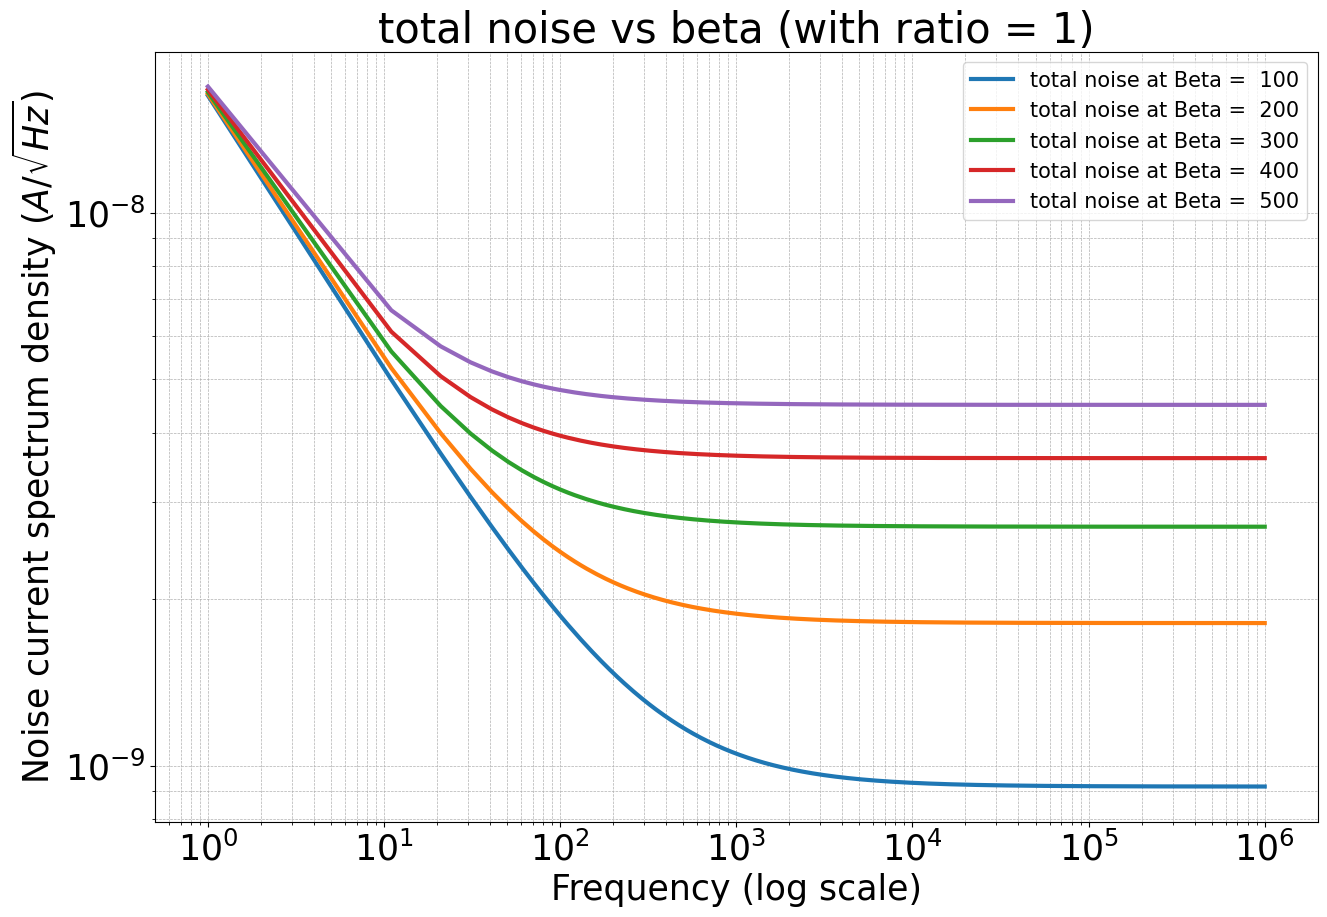

In [79]:
Beta = [100,200,300,400,500]
plt.figure(figsize = (15,10))
for beta in Beta:
    # plt.loglog(f, np.sqrt(flicker_noise(beta, n, T, f))*np.ones(np.size(f)) ,lw =  3, label = f'flicker noise at N =  {n}')
    plt.loglog(f, (S_Ix(beta, 1, T, f))**0.5 ,lw =  3, label = f'total noise at Beta =  {beta}')
plt.title('total noise vs beta (with ratio = 1)',fontsize = 30)
plt.legend()
plt.xlabel('Frequency (log scale)', fontsize = 25)
plt.ylabel(r'Noise current spectrum density $(A/ \sqrt{Hz})$',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

### Changing Rbb'

2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10
2.1337342993949578e-10


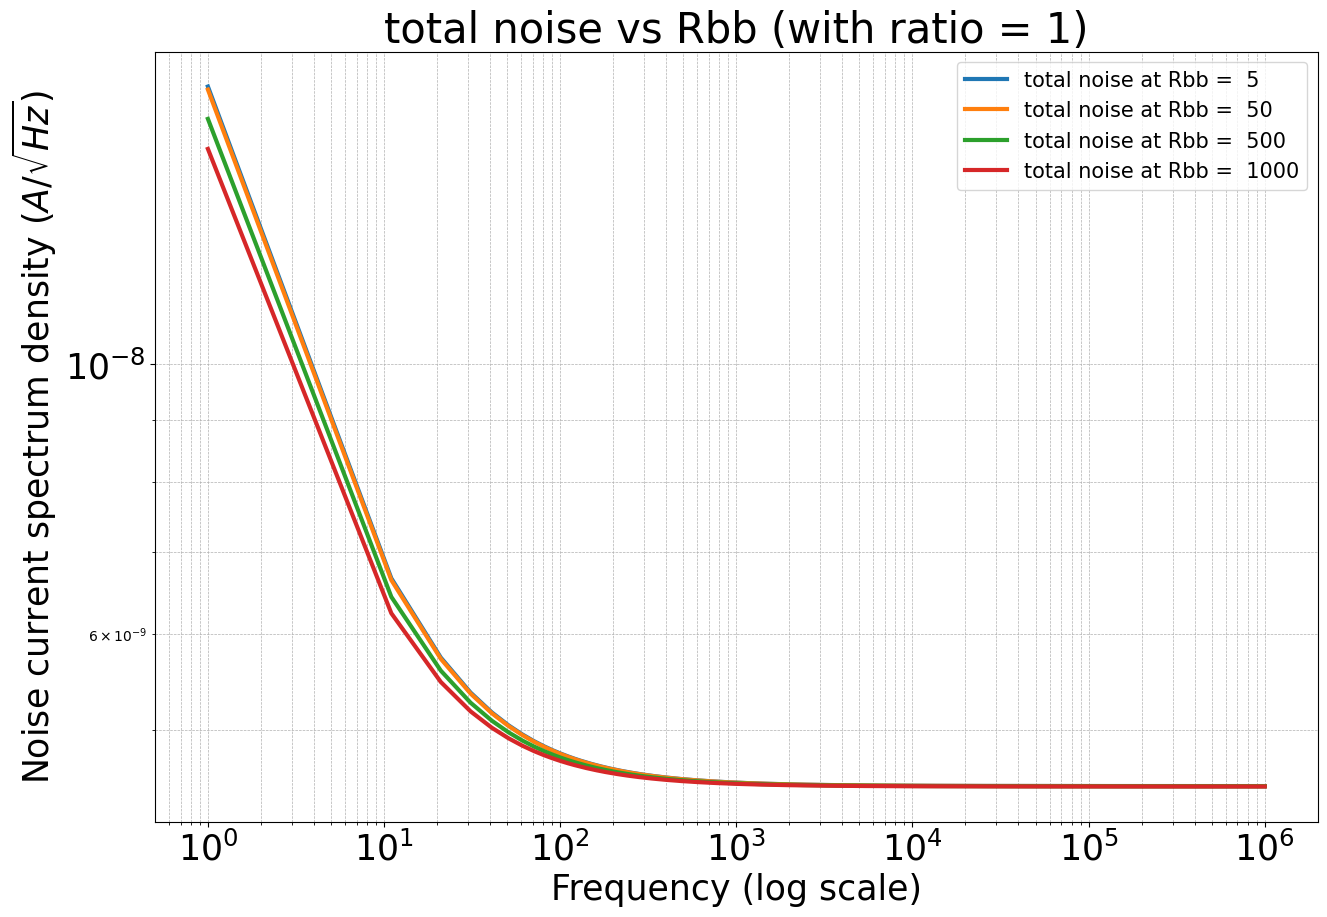

In [80]:
Rbb_prime = [5,50,500,1000]
plt.figure(figsize = (15,10))
for i in Rbb_prime:
    Rbb = i
    # plt.loglog(f, np.sqrt(flicker_noise(beta, n, T, f))*np.ones(np.size(f)) ,lw =  3, label = f'flicker noise at N =  {n}')
    plt.loglog(f, (S_Ix(500, 1, T, f))**0.5 ,lw =  3, label = f'total noise at Rbb =  {i}')
plt.title('total noise vs Rbb (with ratio = 1)',fontsize = 30)
plt.legend()
plt.xlabel('Frequency (log scale)', fontsize = 25)
plt.ylabel(r'Noise current spectrum density $(A/ \sqrt{Hz})$',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

## Ploting data (from cadence simulation)

In [81]:
dir = '../noise_current_mirror/noise1.csv'

In [82]:
data = pd.read_csv('noise_current_mirror_numberchange.csv', skiprows=1, header=None)

2.1337342993949578e-10


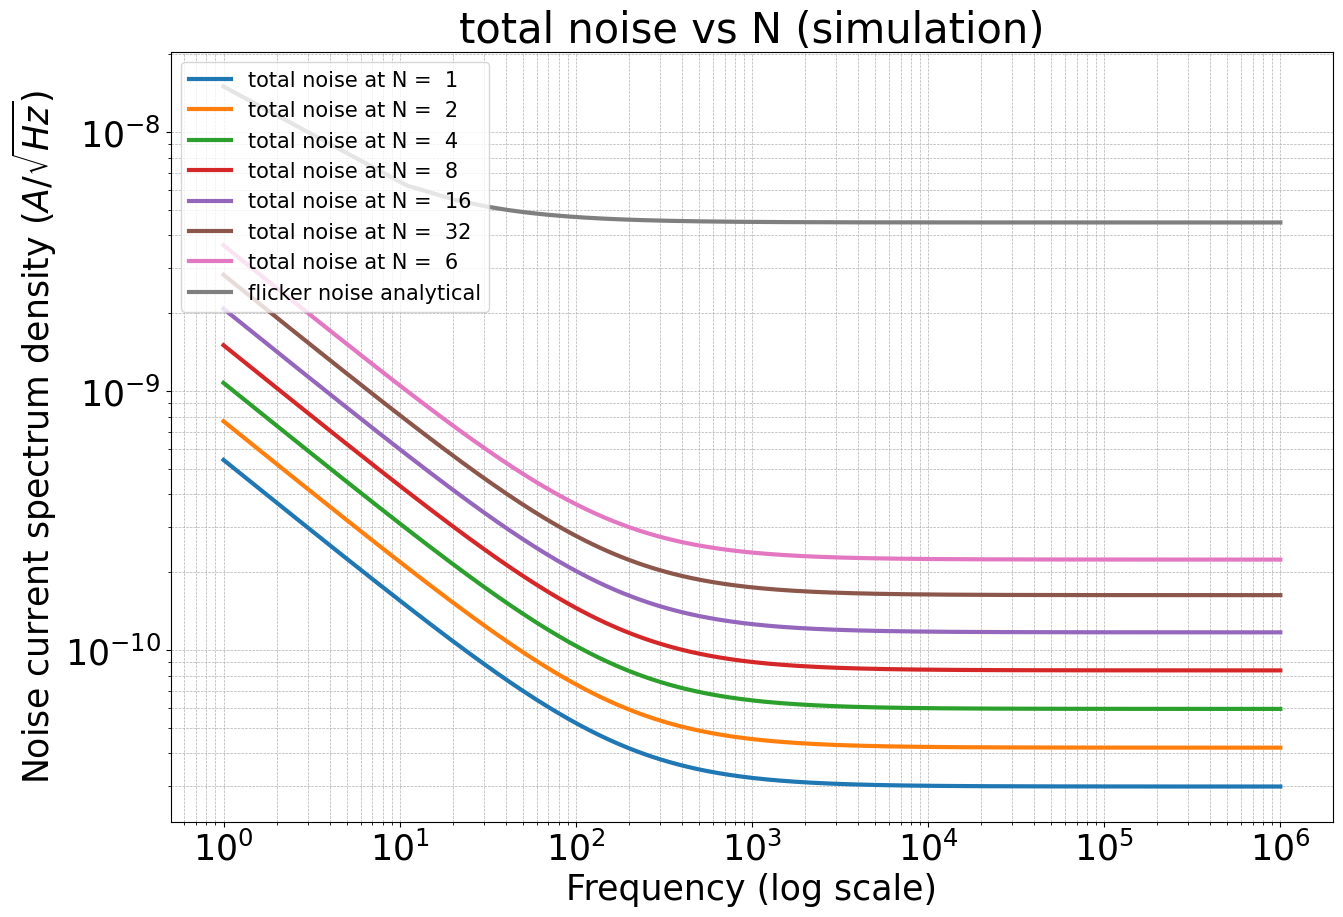

In [83]:
N = [1,2,4,8,16,32,6]
num_col = np.arange(1,8,1)
plt.figure(figsize = (15,10))
for i in num_col:
    # plt.loglog(f, np.sqrt(flicker_noise(beta, n, T, f))*np.ones(np.size(f)) ,lw =  3, label = f'flicker noise at N =  {n}')
    plt.loglog(data[0], data[i] ,lw =  3, label = f'total noise at N =  {N[i-1]}')
plt.loglog(f, np.sqrt(S_Ix(beta, 1, T, f)) ,lw =  3, label = f'flicker noise analytical')
plt.title('total noise vs N (simulation)',fontsize = 30)
plt.legend()
plt.xlabel('Frequency (log scale)', fontsize = 25)
plt.ylabel(r'Noise current spectrum density $(A/ \sqrt{Hz})$',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize = 15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)